<a href="https://colab.research.google.com/github/BandarAlqordi/Computer-Vision-KNN-NB-SVM-DT-image-classifier-for-Flowers-Daisies-vs-Roses/blob/main/Computer_Vision_KNN_NB_SVM_DT_image_classifier_for_Flowers_Daisies_vs_Roses.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# BANDAR ALQORDI 43754580


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from imutils import paths
import numpy as np
import cv2
import os
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
import matplotlib.pyplot as plt

Mounted at /content/gdrive


In [ ]:
def createImageFeatures(image, size=(128, 128)):
    
    image = cv2.resize(image, size)    
    pixel_list = image.flatten()
    return pixel_list

In [ ]:
os.chdir("/content/gdrive/MyDrive/CV/DatasetDaisiesRoses/")
os.listdir()

['daisy', 'rose']

In [ ]:
print("Adding all images to a dataset")
image_paths = list(paths.list_images("/content/gdrive/MyDrive/CV/DatasetDaisiesRoses/"))
raw_images = []
labels = []


for (i, image_path) in enumerate(image_paths):
    image = cv2.imread(image_path)
    label = image_path.split(os.path.sep)[-1].split("(")[0]   
    pixels = createImageFeatures(image)
    raw_images.append(pixels)
    labels.append(label)

Adding all images to a dataset


In [ ]:
raw_images = np.array(raw_images)
labels = np.array(labels)


In [ ]:
raw_images.shape

(1273, 49152)

In [ ]:
len(raw_images)

1273

There are 1273 images in the dataset

In [ ]:
(trainData, testData, trainLabels, testLabels) = train_test_split(
    raw_images, labels, test_size=0.25, random_state=0)

In [ ]:
print("training data points: {}".format(len(trainLabels)))
print("test data points: {}".format(len(testLabels)))

training data points: 954
test data points: 319


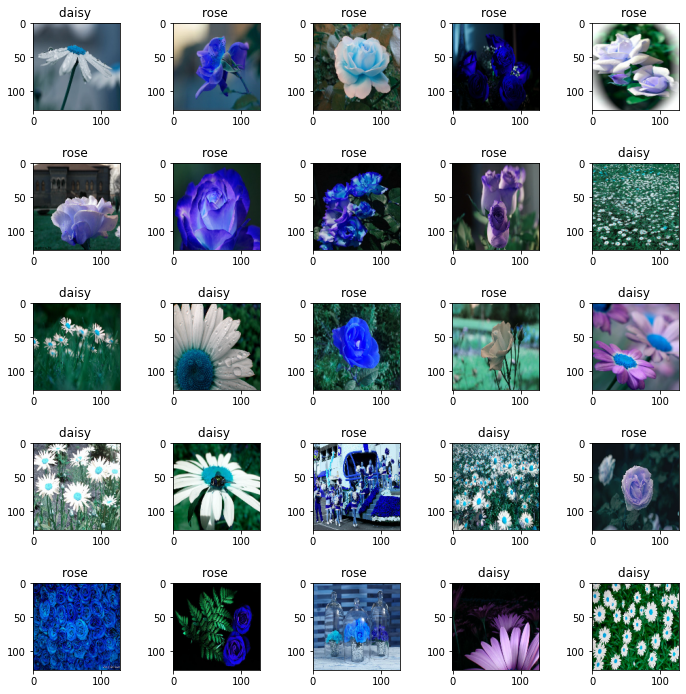

In [ ]:
figure = plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5, 5, i + 1).set_title(trainLabels[i])
  imageP = trainData[i]
  plt.imshow(np.reshape(imageP, (128, 128, 3)))
figure.tight_layout(pad=2.0)

The first 25 images in the dataset with their labels

In [ ]:
knnModel = KNeighborsClassifier(n_neighbors=25)
knnModel.fit(trainData, trainLabels)
prediction =knnModel.predict(testData) 
print(classification_report(testLabels,prediction))

              precision    recall  f1-score   support

      daisy        0.73      0.61      0.67       149
       rose        0.70      0.81      0.75       170

    accuracy                           0.71       319
   macro avg       0.72      0.71      0.71       319
weighted avg       0.72      0.71      0.71       319



Classification Report for KNN image classifiers

In [ ]:
nbModel = GaussianNB()
nbModel.fit(trainData, trainLabels)
predictionNB =nbModel.predict(testData) 
print(classification_report(testLabels,predictionNB))

              precision    recall  f1-score   support

      daisy        0.68      0.77      0.73       149
       rose        0.77      0.69      0.73       170

    accuracy                           0.73       319
   macro avg       0.73      0.73      0.73       319
weighted avg       0.73      0.73      0.73       319



Classification Report for Naïve Bayes image classifiers

In [ ]:
svmModel = SVC(kernel='linear', probability=True, random_state=42)
svmModel.fit(trainData, trainLabels)
SVC(kernel='linear', probability=True, random_state=42)
predictionSVM =svmModel.predict(testData) 
print(classification_report(testLabels,predictionSVM))

              precision    recall  f1-score   support

      daisy        0.69      0.78      0.73       149
       rose        0.78      0.69      0.74       170

    accuracy                           0.73       319
   macro avg       0.74      0.74      0.73       319
weighted avg       0.74      0.73      0.73       319



Classification Report for Support Vector Machine (SVM) image classifiers

In [ ]:
dtModel = DecisionTreeClassifier()
dtModel.fit(trainData, trainLabels)
predictionDT =dtModel.predict(testData) 
print(classification_report(testLabels,predictionDT))

              precision    recall  f1-score   support

      daisy        0.62      0.70      0.66       149
       rose        0.70      0.62      0.66       170

    accuracy                           0.66       319
   macro avg       0.66      0.66      0.66       319
weighted avg       0.66      0.66      0.66       319



Classification Report for Decision Tree image classifiers